Q1: Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 
Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)

In [163]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [1]:
#import warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [164]:
#Read the dataset
Toyota=pd.read_csv('ToyotaCorolla.csv')
Toyota.head()


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [165]:
#check shape of dataset
Toyota.shape

(1436, 38)

There are 1436 rows & 38 columns.

# EDA

In [166]:
#check information about data
Toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [167]:
toyota=Toyota.iloc[:,[2,3,6,8,12,13,15,16,17]]

In [168]:
toyota

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [169]:
#Rename the columns
toyota=toyota.rename({'Age_08_04':'Age','Quarterly_Tax':'QT'},axis=1)
toyota.head()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [170]:
#check data types
toyota.dtypes

Price     int64
Age       int64
KM        int64
HP        int64
cc        int64
Doors     int64
Gears     int64
QT        int64
Weight    int64
dtype: object

In [171]:
#check missing values
toyota.isnull().sum()

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [172]:
#check descriptive statistics
toyota.describe()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [173]:
#check duplicate values
toyota[toyota.duplicated()]


,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


There is one duplicate row.We will drop it.

In [174]:
#drop duplicate values
toyota=toyota.drop(113)

# Correlation Analysis

In [175]:
#check correlation
toyota.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


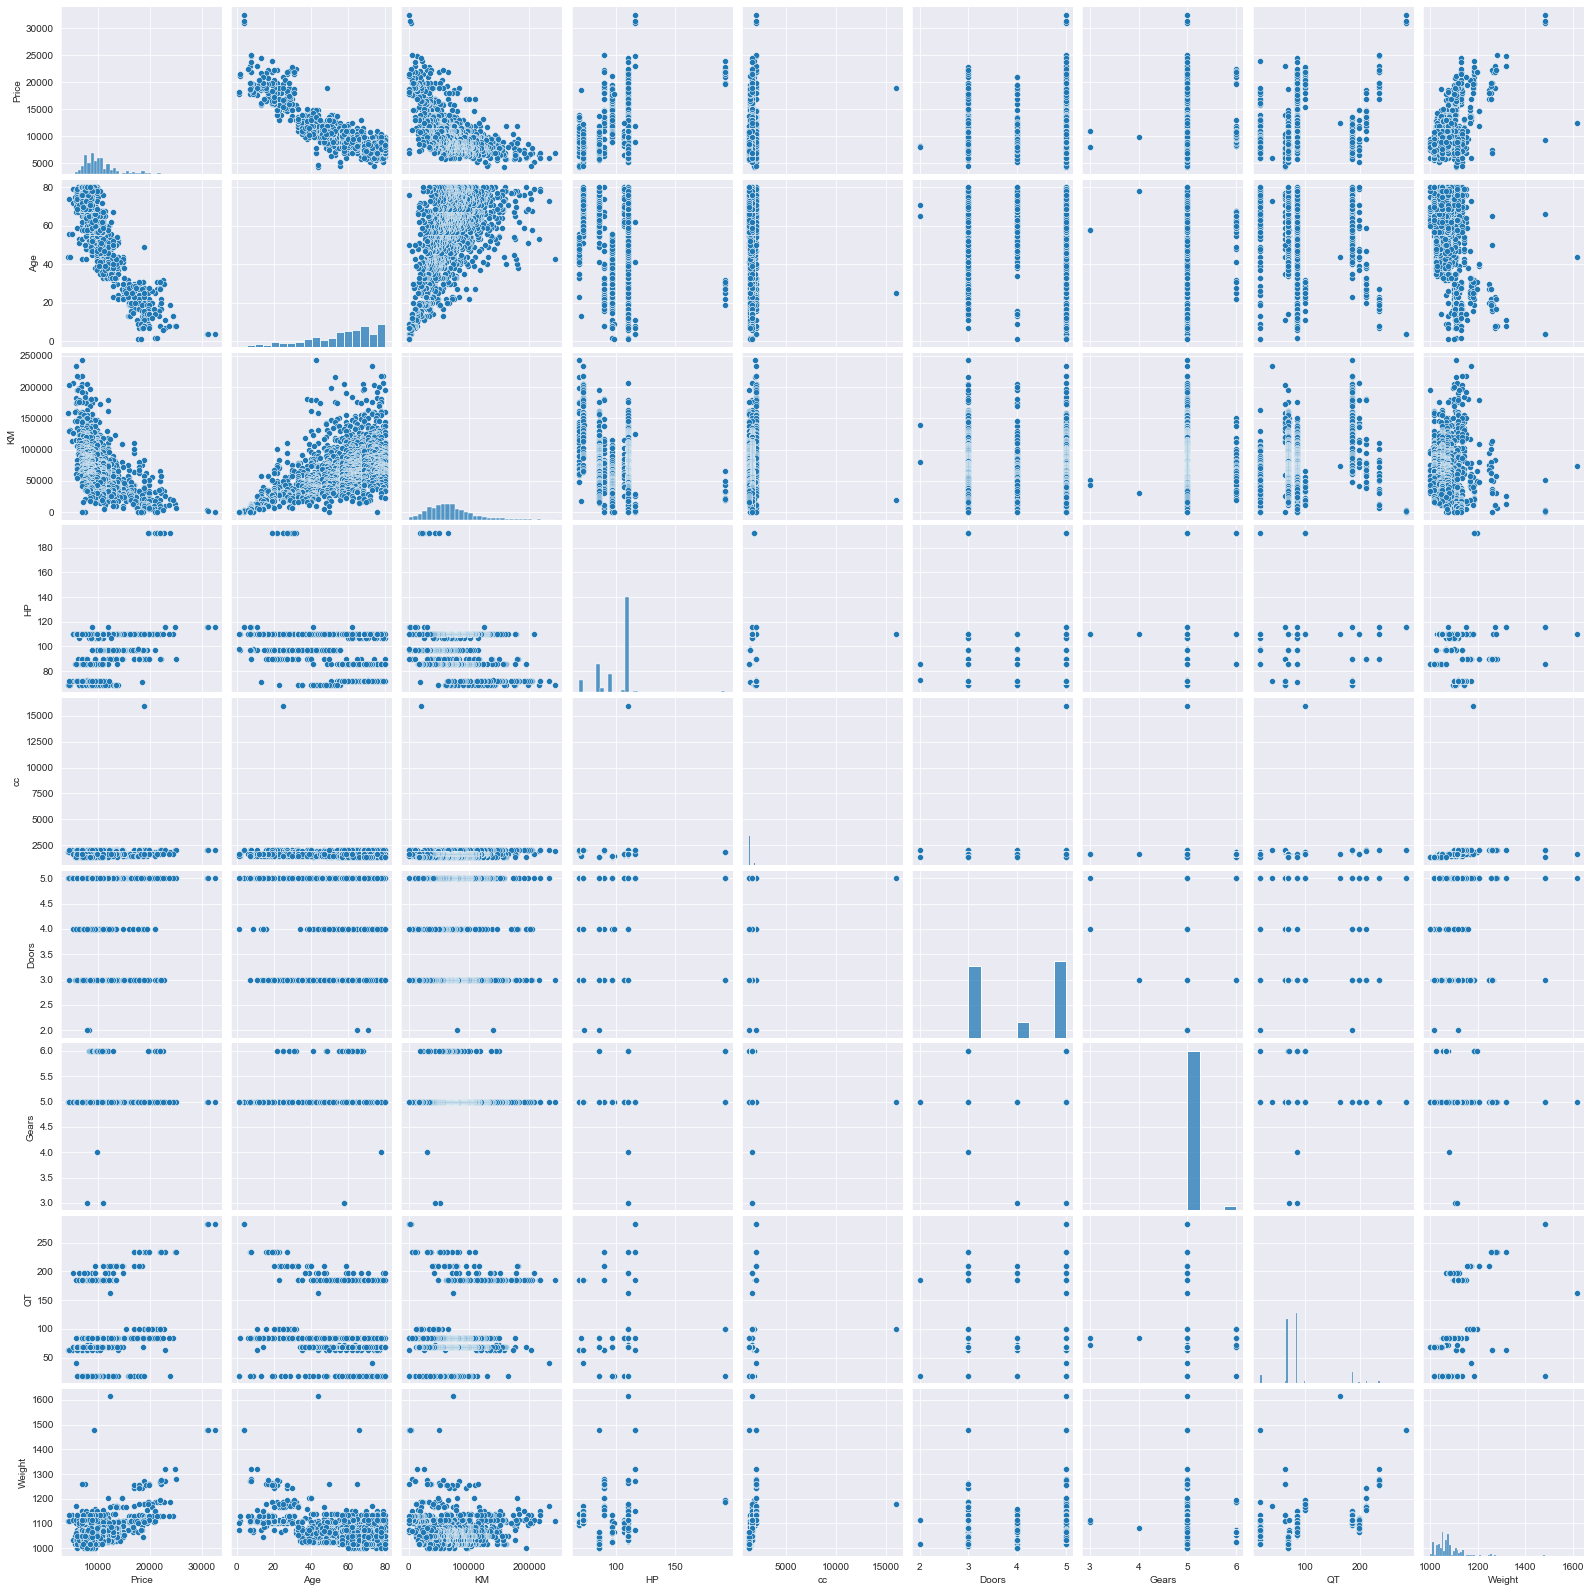

In [176]:
#plot pairplot
sns.set_style(style='darkgrid')
sns.pairplot(toyota)

<AxesSubplot:>

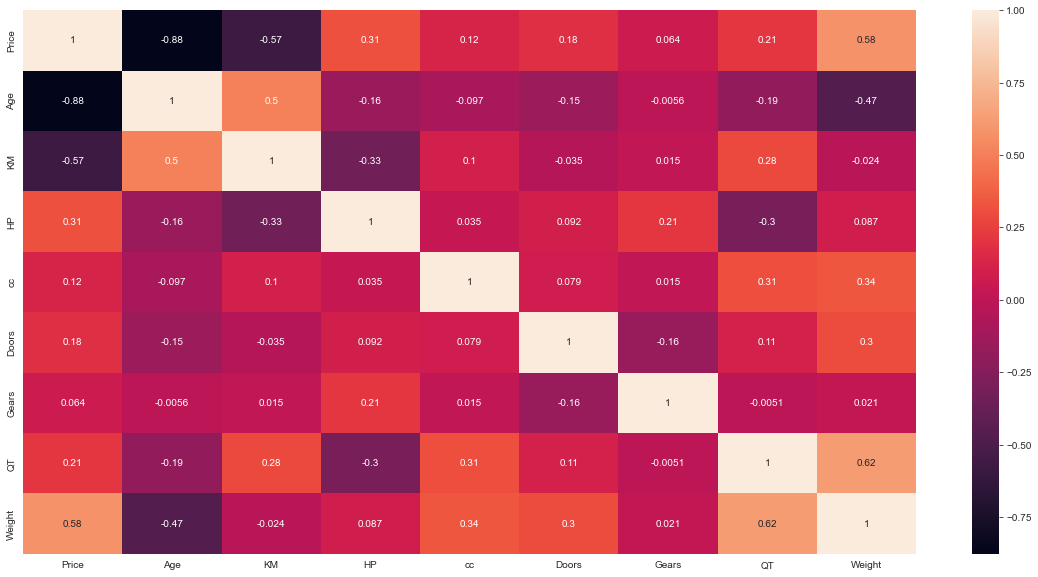

In [297]:
#making a heatmap to check correlation
plt.figure(figsize=(20,10))
sns.heatmap(toyota.corr(),annot=True,xticklabels=True)

# Model Building

In [246]:
#model buildin
model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=toyota).fit()
model


In [247]:
#find coefficientsmodel=smf.ols('# R-squared values
model
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [248]:
# Finding t-values & p-values
model.tvalues,np.round(model.pvalues,5)

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 cc           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept    0.00011
 Age          0.00000
 KM           0.00000
 HP           0.00000
 cc           0.18824
 Doors        0.98164
 Gears        0.00245
 QT           0.00329
 Weight       0.00000
 dtype: float64)

In [249]:
# R-squared values
model.rsquared,model.rsquared_adj
#when adj_rsquared is greater than rsquqred we add irrelevant feature

(0.8625200256947, 0.8617487495415146)

Variable 'CC' & 'Doors' have insignificant pvalues.

Here the p value for 'cc' and 'Doors' is > 0.05, build simple linear regression and multi linear regression models to see pvalues of 'CC' & 'Doors'.

In [250]:
# simple linear regression to check pvalue of 'cc'
slr_a=smf.ols('Price~cc',data=toyota).fit()
slr_a.tvalues, np.round(slr_a.pvalues,6)

(Intercept    24.879592
 cc            4.745039
 dtype: float64,
 Intercept    0.000000
 cc           0.000002
 dtype: float64)

cc have significant pvalue

In [251]:
# simple linear regression to check pvalue of 'Doors'
slr_a=smf.ols('Price~Doors',data=toyota).fit()
slr_a.tvalues, slr_a.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

Doors have significant pvalue

In [252]:
#multi-linear regression to check p valu of both 'ADMS' & 'MKTS'
mlr_am=smf.ols('Price~cc+Doors',data=toyota).fit()
mlr_am.tvalues, mlr_am.pvalues


(Intercept    12.786341
 cc            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 cc           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

here for both the varibles have significant pvalues

That means both the features are important.

# Model Validation Techniques

### 1. Collinearity Check (Calculating VIF) 

In [253]:
# 1) Collinearity Problem Check
# Detecting multicolinearity using vif
# Calculate VIF = 1/(1-Rsquare) for all independent variables
rsq_age=smf.ols('Age~KM+HP+cc+Doors+Gears+QT+Weight',data=toyota).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols('KM~Age+HP+cc+Doors+Gears+QT+Weight',data=toyota).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols('HP~Age+KM+cc+Doors+Gears+QT+Weight',data=toyota).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols('cc~Age+KM+HP+Doors+Gears+QT+Weight',data=toyota).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_doors=smf.ols('Doors~Age+KM+HP+cc+Gears+QT+Weight',data=toyota).fit().rsquared
vif_doors=1/(1-rsq_doors)

rsq_gears=smf.ols('Gears~Age+KM+HP+cc+Doors+QT+Weight',data=toyota).fit().rsquared
vif_gears=1/(1-rsq_gears)

rsq_qt=smf.ols('QT~Age+KM+HP+cc+Doors+Gears+Weight',data=toyota).fit().rsquared
vif_qt=1/(1-rsq_qt)

rsq_weight=smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+QT',data=toyota).fit().rsquared
vif_weight=1/(1-rsq_weight)


# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','cc','Doors','Gears','QT','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qt,vif_weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


Since No value of VIF is greater than 20 , we can say that there is no collinearity problem. So we will consider all columns(features) for building the model

### 2. Residual Analysis

### Test for Normality of Residuals (Q-Q Plot)

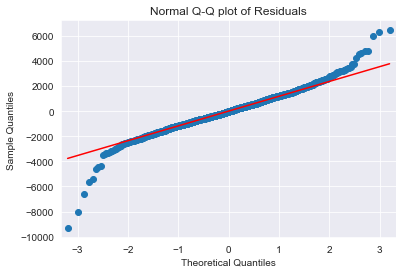

In [254]:
#plot Q-Q plot
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of Residuals')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

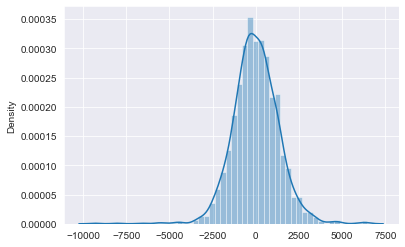

In [255]:
#plot distplot
sns.distplot(model.resid)

In [256]:
list(np.where(model.resid<-5000))

[array([190, 191, 220, 600, 959], dtype=int64)]

# Residual Plot for Homoscedasticity or Heteroscedasticity ( Error vs Target)

In [257]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
def standardized_values (vals):
    return (vals-vals.mean())/vals.std()
    
# def standrs_scaling(X):                 
#     return (x - x.mean())/x.std()
# def get_standardized_values( vals ):
#     return (vals - vals.mean())/vals.std()

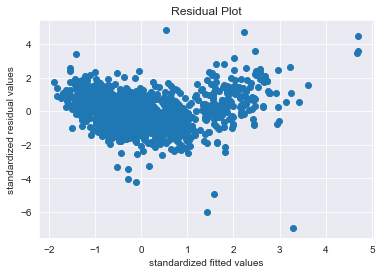

In [258]:
#plot scatterplot
plt.scatter(standardized_values(model.fittedvalues),standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values'),
plt.ylabel('standardized residual values')
plt.show() 

Error VS Target should have no pattern, Error vs target distriburion should be homoscedastic.

Currently The plot between Error and Target is Homoscedastic.

# Model Deletion Diagnostics (checking Outliers or Influencers in ROWS)

## Two Techniques :

### 1. Cook's Distance (Work On Rows) 

In [261]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance #.cooks_distance this atribute detect outlier with respect to the Rows..
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

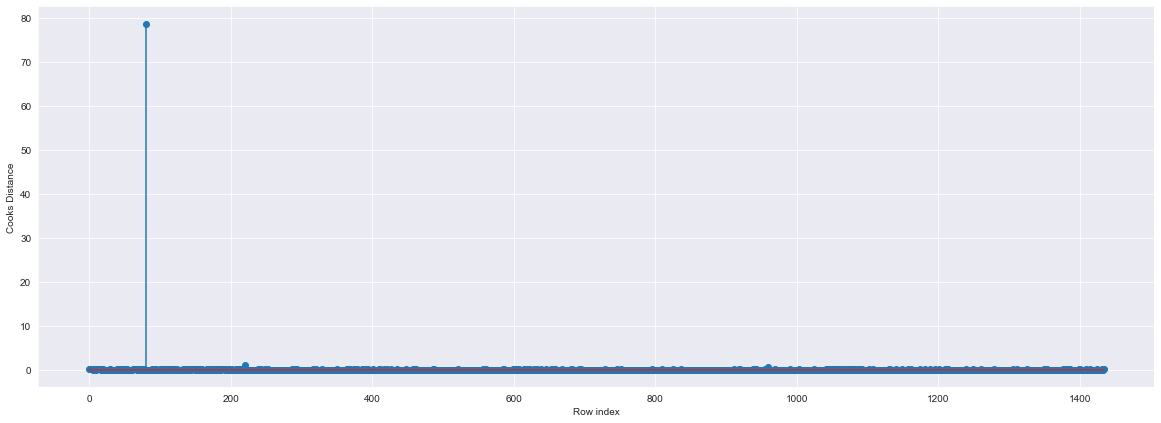

In [262]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota)), np.round(c, 5))  # np.round(c, 5) -> it roundup the values in 3 digits
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [263]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 78.72950582247552)

### 2. Leverage value 

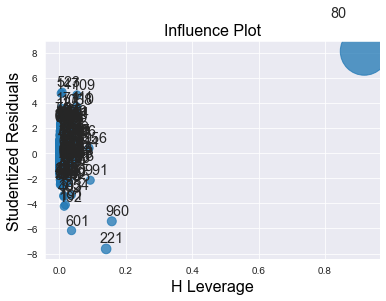

In [264]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

#### From the above plot, it is evident that data point 80 is the influencer.

In [280]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=toyota.shape[1]
n=toyota.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [290]:
toyota[toyota.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the model

In [291]:
#Discard the data points which are influencers and reasign the row number (reset_index())
toyota1=toyota.drop(toyota.index[[80]],axis=0).reset_index(drop=True)
toyota1

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


# Model Deletion Diagnostics and Final Model

In [292]:
#build model
Final_Model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=toyota1).fit()

In [293]:
# R-squared values
Final_Model.rsquared,Final_Model.rsquared_adj

(0.8681163912634055, 0.8673759920564632)

After treating Influencer the Rsquared value is Increased

The model Accuracy is 86.8%

# Model Predictions

In [270]:
# New data for prediction is
new_data=pd.DataFrame({'Age':70,"KM":90000,"HP":110,'cc':2000,'Doors':6,'Gears':6,'QT':208,'Weight':1168},index=[0])
new_data

,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,70,90000,110,2000,6,6,208,1168


In [271]:
# Manual Prediction of Price
Final_Model.predict(new_data)

0    11358.484308
dtype: float64

In [272]:
# Automatic Prediction of Price 
pred_y=Final_Model.predict(toyota1)
pred_y

0       16513.565909
1       16051.656226
2       16486.949796
3       16133.995128
4       15921.372341
            ...     
1429     8970.611964
1430     8435.944671
1431     8591.765915
1432     8714.053275
1433     9966.948423
Length: 1434, dtype: float64

# Table containing R^2 value for each prepared model

In [273]:
d2={'Prep_Models':['model','Final_Model'],'Rsquared':[model.rsquared,Final_Model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,model,0.862520
1,Final_Model,0.868116
